# This is gonna be a numeric approximator for the second-order diff eq that describes a damped harmonic oscillator.
Takes a while to run, but it gives you the option to save so you don't have to rerun.

In [199]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.style.use('dark_background')
import pandas as pd

In [200]:
# physical constants:
g = 9.80665 # from https://physics.nist.gov/cgi-bin/cuu/Value?gn

# for now I will leave these as guess parameters. 
L = 1 # meter
b = 0.5 # damping coef guess
m = 1 # kg

start_time = 0
stop_time = 10 # feel free to change this
delta_t = 0.001 # change this for desired precision

# initial conditions:
THETA_0 = np.radians(5) # pendulum is initially 5 degrees
THETA_DOT_0 = 0 # no inital angular velocity

# definition of ODE:
def get_theta_double_dot(theta, theta_dot):
    return -(b/m*theta_dot + g/L*np.sin(theta))

# for plotting
theta_list = []
theta_dot_list = []
theta_double_dot_list = []

# solve the ODE through numeric aprrox
def get_thetas(t):
    # inital
    theta = THETA_0
    theta_dot = THETA_DOT_0
    theta_double_dot = get_theta_double_dot(theta, theta_dot) # must be initialized outside of for loop
    for time in np.arange(0, t, delta_t):
        theta_double_dot = get_theta_double_dot(theta, theta_dot)
        theta_dot += theta_double_dot* delta_t
        theta += theta_dot * delta_t
    return theta, theta_dot, theta_double_dot

In [201]:
time = np.arange(start_time, stop_time, delta_t)
for t in time:
    theta,theta_dot,theta_double_dot = get_thetas(t)
    theta_list.append(theta)
    theta_dot_list.append(theta_dot)
    theta_double_dot_list.append(theta_double_dot)

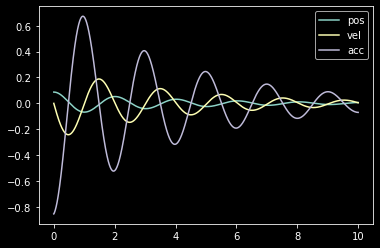

In [202]:
plt.plot(time, theta_list, label = 'pos')
plt.plot(time, theta_dot_list, label = 'vel')
plt.plot(time, theta_double_dot_list, label = 'acc')
plt.legend()

In [203]:
write_text = input("If you write to a text file, you won't have to rerun the script. \nWrite to text file? [y/n]:" )
if write_text == 'y':
    accel_df = pd.DataFrame()
    accel_df['time'] = time
    accel_df['rot accel'] = theta_double_dot_list
    accel_df.to_csv(r'Rotational_accel_fit.csv', index = False)

If you write to a text file, you won't have to rerun the script. 
Write to text file? [y/n]: y
